In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from pylab import rcParams
%pylab inline
rcParams['figure.figsize'] = 12, 6

Populating the interactive namespace from numpy and matplotlib


#Examine Sales Data

In [2]:
tr = pd.read_csv('input/train.csv')
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 77.6+ MB


/Library/Python/2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
tr.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209,558.429727,321.908651,1,280,558,838,1115
DayOfWeek,1017209,3.998341,1.997391,1,2,4,6,7
Sales,1017209,5773.818972,3849.926175,0,3727,5744,7856,41551
Customers,1017209,633.145946,464.411734,0,405,609,837,7388
Open,1017209,0.830107,0.375539,0,1,1,1,1
Promo,1017209,0.381515,0.485759,0,0,0,1,1
SchoolHoliday,1017209,0.178647,0.383056,0,0,0,0,1


In [4]:
tr[:10]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [5]:
tr.Store.value_counts()[:10]

1023    942
666     942
675     942
163     942
674     942
162     942
673     942
161     942
672     942
160     942
dtype: int64

In [6]:
tr.DayOfWeek.value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
dtype: int64

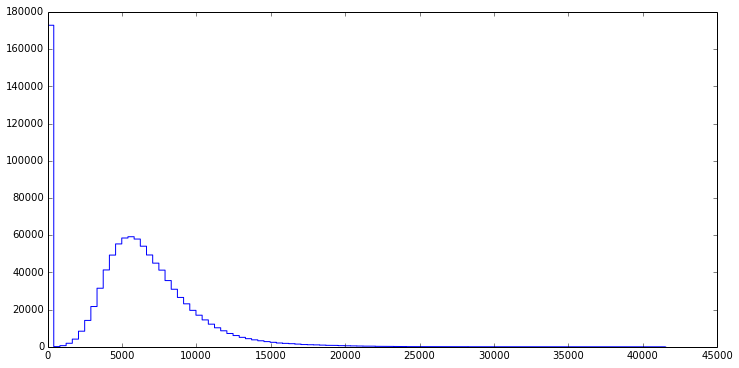

In [7]:
_ = plt.hist(tr.Sales, bins=100, histtype='step')

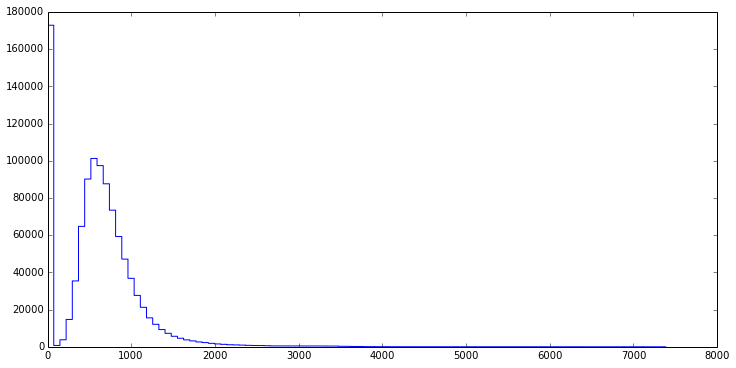

In [8]:
_ = plt.hist(tr.Customers, bins=100, histtype='step')

In [9]:
tr.Open.value_counts()

1    844392
0    172817
dtype: int64

In [10]:
tr.Promo.value_counts()

0    629129
1    388080
dtype: int64

In [11]:
tr.SchoolHoliday.value_counts()

0    835488
1    181721
dtype: int64

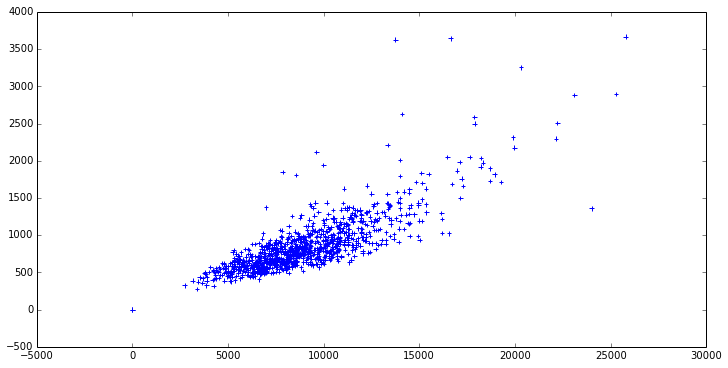

In [12]:
_ = plt.scatter(tr[:1000].Sales, tr[:1000].Customers, marker='+')

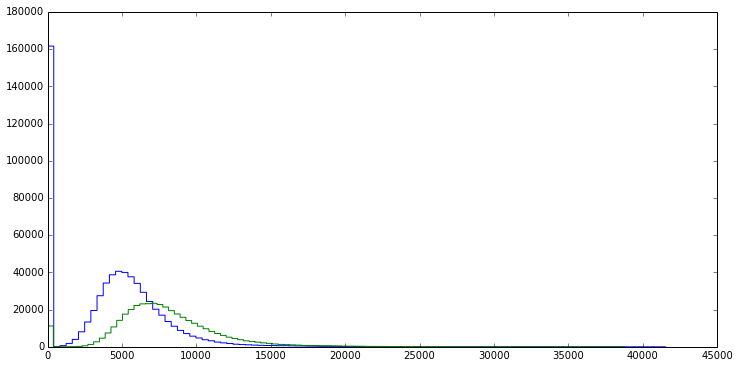

In [13]:
_ = plt.hist(tr[tr.Promo == 0].Sales.values, bins=100, histtype='step')
_ = plt.hist(tr[tr.Promo == 1].Sales.values, bins=100, histtype='step')

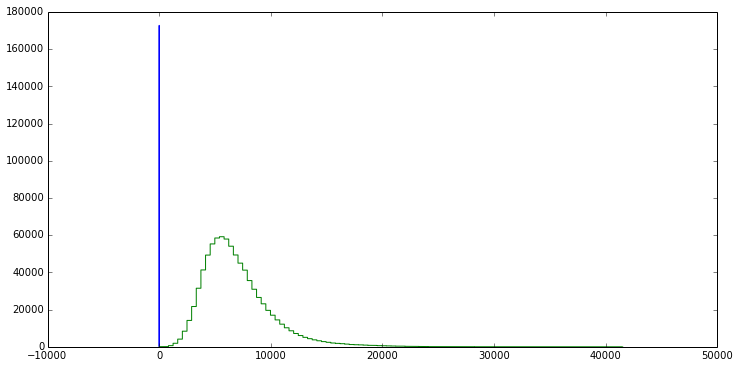

In [14]:
_ = plt.hist(tr[tr.Open == 0].Sales.values, bins=100, histtype='step')
_ = plt.hist(tr[tr.Open == 1].Sales.values, bins=100, histtype='step')

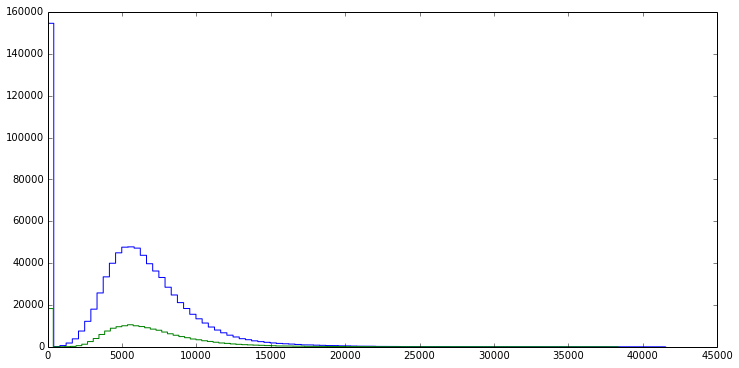

In [15]:
_ = plt.hist(tr[tr.SchoolHoliday == 0].Sales.values, bins=100, histtype='step')
_ = plt.hist(tr[tr.SchoolHoliday == 1].Sales.values, bins=100, histtype='step')

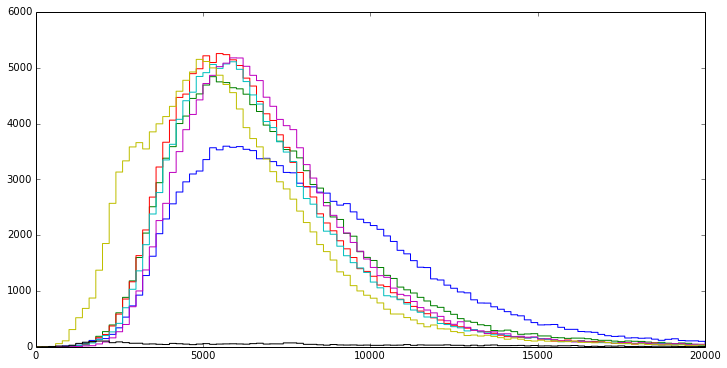

In [16]:
for day in range(1, 8):
    _ = plt.hist(tr[tr.DayOfWeek == day].Sales.values, bins=100, histtype='step', range=[1, 20000])

In [17]:
tr.Date.value_counts()[:10]

2015-07-28    1115
2013-07-01    1115
2014-06-17    1115
2014-06-16    1115
2014-06-15    1115
2014-06-14    1115
2013-08-30    1115
2013-08-31    1115
2013-07-04    1115
2013-07-05    1115
dtype: int64

In [18]:
tr.StateHoliday.value_counts()[:10]

0    855087
0    131072
a     20260
b      6690
c      4100
dtype: int64

In [32]:
tr.groupby(by='Store').count()[:5]

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,942,942,942,942,942,942,942,942
2,942,942,942,942,942,942,942,942
3,942,942,942,942,942,942,942,942
4,942,942,942,942,942,942,942,942
5,942,942,942,942,942,942,942,942


In [34]:
tr[tr.Store == 1].Date[:10]

0        2015-07-31
1115     2015-07-30
2230     2015-07-29
3345     2015-07-28
4460     2015-07-27
5575     2015-07-26
6690     2015-07-25
7805     2015-07-24
8920     2015-07-23
10035    2015-07-22
Name: Date, dtype: object

In [35]:
tr[tr.Store == 1].Date[-10:]

1006060    2013-01-10
1007175    2013-01-09
1008290    2013-01-08
1009405    2013-01-07
1010520    2013-01-06
1011635    2013-01-05
1012750    2013-01-04
1013865    2013-01-03
1014980    2013-01-02
1016095    2013-01-01
Name: Date, dtype: object

#Examine Test Data

In [36]:
te = pd.read_csv('input/test.csv')
te.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.8+ MB


In [37]:
te.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,41088,20544.500000,11861.228267,1,10272.75,20544.5,30816.25,41088
Store,41088,555.899533,320.274496,1,279.75,553.5,832.25,1115
DayOfWeek,41088,3.979167,2.015481,1,2.00,4.0,6.00,7
Open,41077,0.854322,0.352787,0,1.00,1.0,1.00,1
Promo,41088,0.395833,0.489035,0,0.00,0.0,1.00,1
SchoolHoliday,41088,0.443487,0.496802,0,0.00,0.0,1.00,1


In [38]:
te[:10]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0
5,6,10,4,2015-09-17,1,1,0,0
6,7,11,4,2015-09-17,1,1,0,0
7,8,12,4,2015-09-17,1,1,0,0
8,9,13,4,2015-09-17,1,1,0,0
9,10,14,4,2015-09-17,1,1,0,0


In [39]:
te.groupby(by='Store').count()[:5]

,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,
1,48,48,48,48,48,48,48
3,48,48,48,48,48,48,48
7,48,48,48,48,48,48,48
8,48,48,48,48,48,48,48
9,48,48,48,48,48,48,48


In [40]:
te[te.Store == 1].Date[:10]

0       2015-09-17
856     2015-09-16
1712    2015-09-15
2568    2015-09-14
3424    2015-09-13
4280    2015-09-12
5136    2015-09-11
5992    2015-09-10
6848    2015-09-09
7704    2015-09-08
Name: Date, dtype: object

In [41]:
te[te.Store == 1].Date[-10:]

32528    2015-08-10
33384    2015-08-09
34240    2015-08-08
35096    2015-08-07
35952    2015-08-06
36808    2015-08-05
37664    2015-08-04
38520    2015-08-03
39376    2015-08-02
40232    2015-08-01
Name: Date, dtype: object

#Examine Store Data

In [19]:
s = pd.read_csv('input/store.csv')
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 95.8+ KB


In [20]:
s.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115,558.000000,322.017080,1,279.5,558,836.5,1115
CompetitionDistance,1112,5404.901079,7663.174720,20,717.5,2325,6882.5,75860
CompetitionOpenSinceMonth,761,7.224704,3.212348,1,4.0,8,10.0,12
CompetitionOpenSinceYear,761,2008.668857,6.195983,1900,2006.0,2010,2013.0,2015
Promo2,1115,0.512108,0.500078,0,0.0,1,1.0,1
Promo2SinceWeek,571,23.595447,14.141984,1,13.0,22,37.0,50
Promo2SinceYear,571,2011.763573,1.674935,2009,2011.0,2012,2013.0,2015


In [21]:
s[:10]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN
5,6,a,a,310,12,2013,0,NaN,NaN,NaN
6,7,a,c,24000,4,2013,0,NaN,NaN,NaN
7,8,a,a,7520,10,2014,0,NaN,NaN,NaN
8,9,a,c,2030,8,2000,0,NaN,NaN,NaN
9,10,a,a,3160,9,2009,0,NaN,NaN,NaN


In [22]:
s.Store.value_counts()[:10]

1115    1
374     1
368     1
369     1
370     1
371     1
372     1
373     1
375     1
383     1
dtype: int64

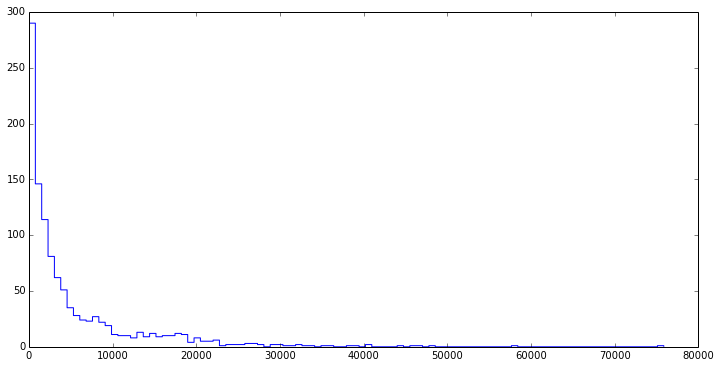

In [23]:
_ = plt.hist(s.CompetitionDistance.dropna(), bins=100, histtype='step')

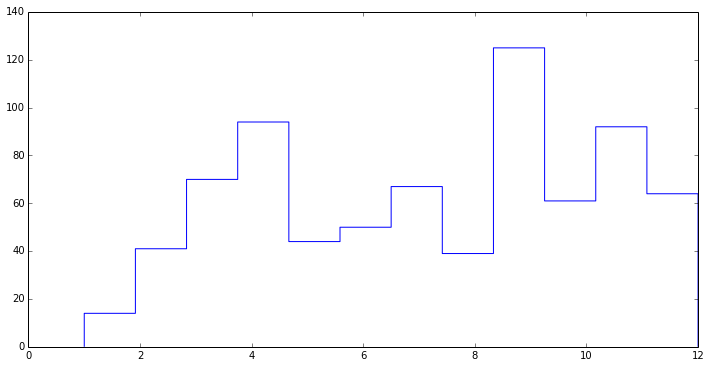

In [24]:
_ = plt.hist(s.CompetitionOpenSinceMonth.dropna(), bins=12, histtype='step')

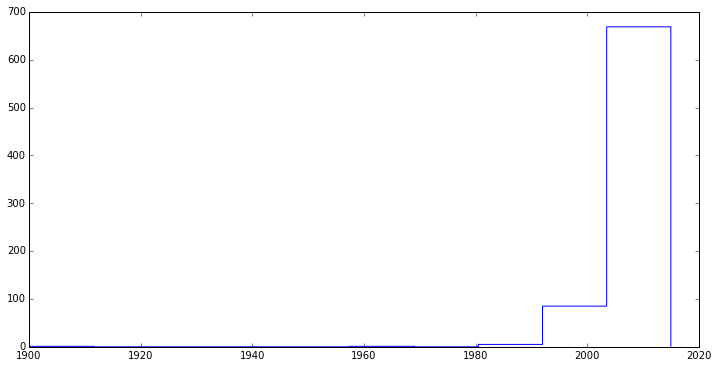

In [25]:
_ = plt.hist(s.CompetitionOpenSinceYear.dropna(), histtype='step')

In [26]:
s.Promo2.value_counts()

1    571
0    544
dtype: int64

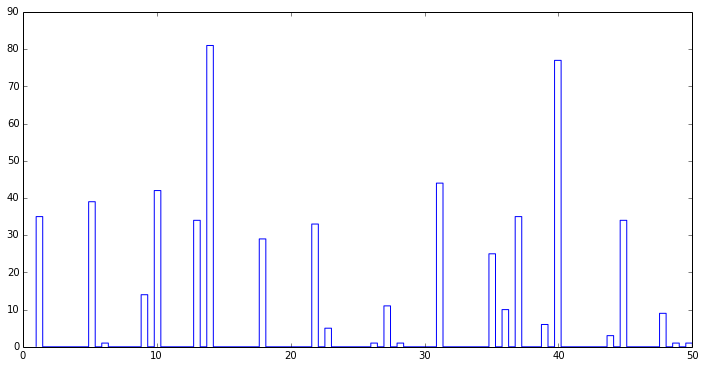

In [27]:
_ = plt.hist(s.Promo2SinceWeek.dropna().values, bins=100, histtype='step')

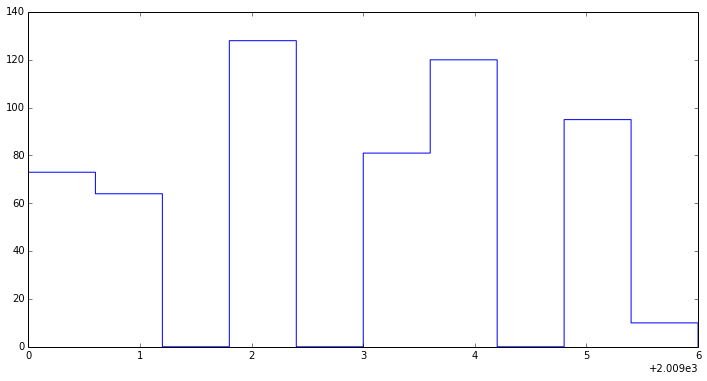

In [28]:
_ = plt.hist(s.Promo2SinceYear.dropna().values, histtype='step')

In [29]:
s.StoreType.value_counts()[:10]

a    602
d    348
c    148
b     17
dtype: int64

In [30]:
s.Assortment.value_counts()[:10]

a    593
c    513
b      9
dtype: int64